## Lets do some dataset exploration
- we will start by importing a section of our dataset to get an idea about what is in it


In [1]:
import pandas as pd

#constant to keep trakc of where the datafiles are stored
DATA_FILES_PATH = 'projectDataFiles/'
LABEL = 'fare_amount'

# dataframe to analyze the dataset
INTRO_DF = pd.read_csv(f'{DATA_FILES_PATH}train.csv', nrows=2000000)

# describe the dataset
INTRO_DF.describe()

# TODO: Show comparison of using non optimal dataset to cleaned up dataset

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


### Finding possible outliers we can remove
- above we can see that there are some entries with zero passengers!
- there is also some crazy latitude and longitudes in the set

### Now let's plot our data to learn more

# Jose
using Google maps API might be over used due to size of data and will be charged

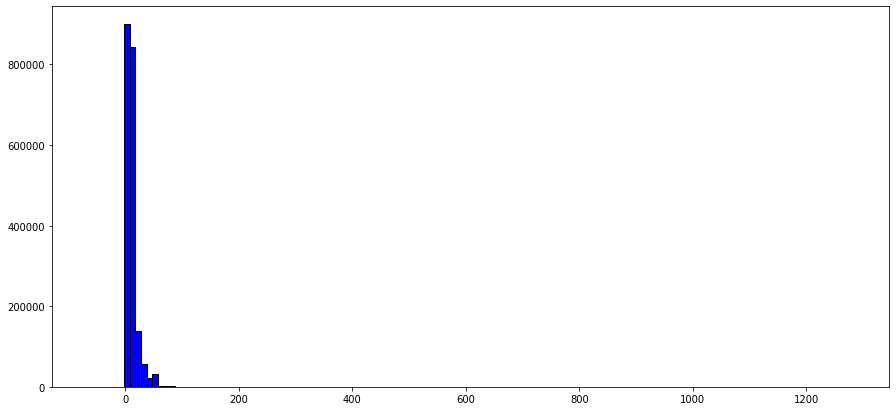

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure(figsize=(15, 7))
plt.hist(INTRO_DF['fare_amount'], color = 'blue', edgecolor = 'black', bins = np.arange(min(INTRO_DF['fare_amount']), max(INTRO_DF['fare_amount']) + 10, 10))
plt.show()

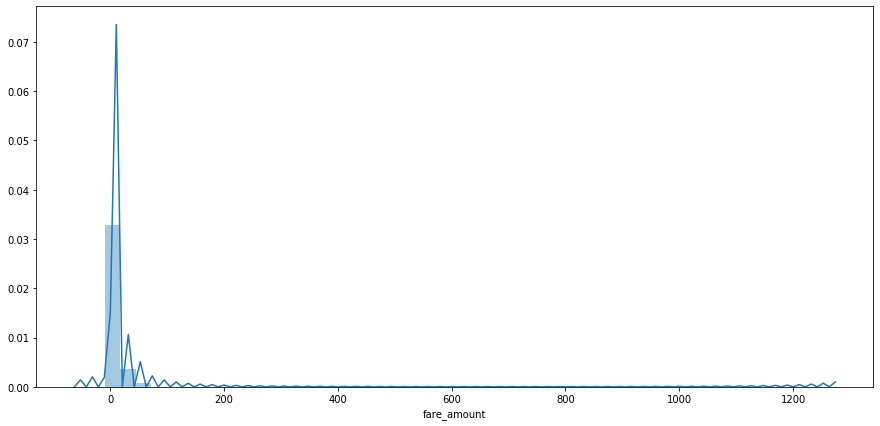

In [3]:
import seaborn as sbn

plt.figure(figsize=(15, 7))
sbn.distplot(INTRO_DF['fare_amount'])
plt.show()

In [4]:
print(f'Number of Negative fare amounts: {len(INTRO_DF[INTRO_DF[LABEL] < 0])}')
print(f'Number of very high fare amounts: {len(INTRO_DF[INTRO_DF[LABEL] >= 100])}')

# remove the negative and zero fare amounts
INTRO_DF[(INTRO_DF[LABEL] > 0) & (INTRO_DF[LABEL] <= 100)].describe()

Number of Negative fare amounts: 77
Number of very high fare amounts: 857


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999082e+06,1.999082e+06,1.999082e+06,1.999068e+06,1.999068e+06,1.999082e+06
mean,1.129716e+01,-7.252568e+01,3.993097e+01,-7.252710e+01,3.992978e+01,1.684255e+00
std,9.415145e+00,1.286237e+01,7.980971e+00,1.276726e+01,1.032219e+01,1.315118e+00
min,1.000000e-02,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073492e+01,-7.399140e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398016e+01,4.075313e+01,1.000000e+00
75%,1.250000e+01,-7.396714e+01,4.076710e+01,-7.396370e+01,4.076809e+01,2.000000e+00
max,1.000000e+02,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


Taxis with zero passengers: 7123


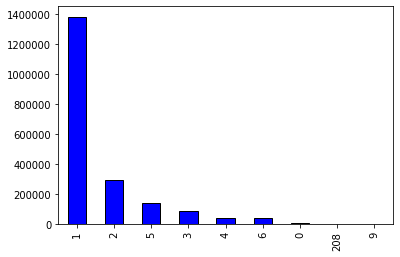

In [5]:
print(f"Taxis with zero passengers: {len(INTRO_DF[INTRO_DF['passenger_count'] == 0])}")
INTRO_DF['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k')
plt.show()

In [6]:
# import geopandas as gpd

import matplotlib.pyplot as plt
# NYC Boundaries
NYC_BOUNDARY = (-74.5, -72.8, 40.5, 41.8) # in format WEST, EAST, NORTH, SOUTH
ruh_m = plt.imread('images\map.png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(INTRO_DF.pickup_longitude, INTRO_DF.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Pick up lat and lon')
ax.set_xlim(NYC_BOUNDARY[0],NYC_BOUNDARY[1])
ax.set_ylim(NYC_BOUNDARY[2],NYC_BOUNDARY[3])
ax.imshow(ruh_m, zorder=0, extent = NYC_BOUNDARY, aspect= 'equal')

FileNotFoundError: [Errno 2] No such file or directory: 'images\\map.png'

In [ ]:
ruh_m = plt.imread('images\map.png')

fig, ay = plt.subplots(figsize = (8,7))
ay.scatter(INTRO_DF.dropoff_longitude, INTRO_DF.dropoff_latitude, zorder=1, alpha= 0.2, c='r', s=10)
ay.set_title('Plotting drop off Pick up lat and lon')
ay.set_xlim(NYC_BOUNDARY[0],NYC_BOUNDARY[1])
ay.set_ylim(NYC_BOUNDARY[2],NYC_BOUNDARY[3])
ay.imshow(ruh_m, zorder=0, extent = NYC_BOUNDARY, aspect= 'equal')

## Define a function to get the real distance between to lat/long points
- Manhattan distance should be useful, but I think we can do better with real distance
- Here we compare a manual calculation to the geopy library

In [ ]:
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
import reverse_geocoder as rg
import numpy as np

def geo_manhattan_distance(lat1, lat2, long1, long2):
    """
    pickup_longitude   pickup_latitude   dropoff_longitude   dropoff_latitude
    x1                 y1                x2                  y2
    returns the manhattan distance between two geo points
    """
    return abs(lat2 - lat1) + abs(long2 - long1)

def geopy_dist(coord1, coord2):
    try:
        return geopy.distance.distance(coord1, coord2).kilometers
    except:
        return -1

def haversine(lat1, lon1, lat2, lon2, m_const=3958.8):
    lat1, lon1, lat2, lon2 = map(abs, [lat1, lon1, lat2, lon2])
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    mi = m_const * c
    return mi            

## Here we define some filter functions that can help us remove outliers from our dataset
- within boundary limits the dataset to only geo points in the boundary zone
- not_at_airport is a function to filter out those getting picked up or dropped off at an airport
- reasonable_fare is a way to limit outlier fares (see plots below on why values were chosen)

In [ ]:
# filter functions to reduce the dataset
def within_boundary(dataframe, boundary):
    return (dataframe['pickup_longitude'] >= boundary[0]) & (dataframe['pickup_longitude'] <= boundary[1]) & \
            (dataframe['pickup_latitude'] >= boundary[2]) & (dataframe['pickup_latitude'] <= boundary[3]) & \
            (dataframe['dropoff_longitude'] >= boundary[0]) & (dataframe['dropoff_longitude'] <= boundary[1]) & \
            (dataframe['dropoff_latitude'] >= boundary[2]) & (dataframe['dropoff_latitude'] <= boundary[3])

def not_at_airport(dataframe):
    return ~((dataframe['pickup_to_jfk'] < 1) | (dataframe['dropoff_to_jfk'] < 1)) & \
            ~((dataframe['pickup_to_laguardia'] < 1) | (dataframe['dropoff_to_laguardia'] < 1))


def has_passengers(dataframe):
    return (dataframe['passenger_count'] != 0) & (dataframe['passenger_count'] <= 6)
    
def reasonable_fare(dataframe):
    return (dataframe['fare_amount'].between(left=0, right=100))

## Define a process dataframe function
- this function will perform our feature engineering and feature removals

In [ ]:
def process_df(dataframe, train_data=True):
    pd.set_option('use_inf_as_na', True)
    dataframe['pickup_datetime'] = dataframe['pickup_datetime'].str.slice(0, 16)
    dataframe['pickup_datetime'] = pd.to_datetime(dataframe['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    # the distance between the pickup and dropoff points
    dataframe['real_dist'] = haversine(dataframe['pickup_latitude'], dataframe['pickup_longitude'], dataframe['dropoff_latitude'], dataframe['dropoff_longitude'])

    # add the deconstructed date
    dataframe['hour'] = dataframe['pickup_datetime'].dt.hour
    dataframe['day'] = dataframe['pickup_datetime'].dt.day
    dataframe['month'] = dataframe['pickup_datetime'].dt.month
    dataframe['year'] = dataframe['pickup_datetime'].dt.year
    
    add_year = pd.get_dummies(dataframe['year'], prefix='year')
    
    dataframe = pd.concat([dataframe, add_year], axis=1)
    
    # converting cyclical variables to sin / cos
    dataframe['hour_sin'] = np.sin(dataframe['hour'] * ( 2 * np.pi / 24))
    dataframe['hour_cos'] = np.cos(dataframe['hour'] * ( 2 * np.pi / 24))
    dataframe['day_sin'] = np.sin(dataframe['day'] * ( 2 * np.pi / 7))
    dataframe['day_cos'] = np.cos(dataframe['day'] * ( 2 * np.pi / 7))
    dataframe['month_sin'] = np.sin((dataframe['month'] - 1) * (2 * np.pi / 12))
    dataframe['month_cos'] = np.cos((dataframe['month'] - 1) * (2 * np.pi / 12))

    # add the distances to the airports
    dataframe['pickup_to_jfk'] = haversine(dataframe['pickup_latitude'], dataframe['pickup_longitude'], JFK_COORD[0], JFK_COORD[1])
    dataframe['dropoff_to_jfk'] = haversine(dataframe['dropoff_latitude'], dataframe['dropoff_longitude'], JFK_COORD[0], JFK_COORD[1])
    dataframe['pickup_to_laguardia'] = haversine(dataframe['pickup_latitude'], dataframe['pickup_longitude'], LAGUARDIA_COORD[0], LAGUARDIA_COORD[1])
    dataframe['dropoff_to_laguardia'] = haversine(dataframe['dropoff_latitude'], dataframe['dropoff_longitude'], LAGUARDIA_COORD[0], LAGUARDIA_COORD[1])
    
    # distance from center of new york
    dataframe['dropoff_from_center'] = haversine(dataframe['dropoff_latitude'], dataframe['dropoff_longitude'], NYC_COORD[0], NYC_COORD[1])
    dataframe['pickup_from_center'] = haversine(dataframe['pickup_latitude'], dataframe['pickup_longitude'], NYC_COORD[0], NYC_COORD[1])
        
    # get abs lat / lon distances
    dataframe['dlat'] = abs(dataframe['pickup_latitude'] - dataframe['dropoff_latitude'])
    dataframe['dlon'] = abs(dataframe['pickup_longitude'] - dataframe['dropoff_longitude'])
    dataframe['m_dist'] = geo_manhattan_distance(dataframe['pickup_latitude'], dataframe['pickup_longitude'], dataframe['dropoff_latitude'], dataframe['dropoff_longitude'])
    
    # applying filters
    dataframe = dataframe[within_boundary(dataframe, NYC_BOUNDARY) & has_passengers(dataframe) & reasonable_fare(dataframe)].copy()

    # drop uneccessary columns
    dataframe.drop([
        'key',
        'pickup_datetime', 
        'pickup_longitude', 
        'pickup_latitude', 
        'dropoff_latitude', 
        'dropoff_longitude'
    ], axis=1, inplace=True)
    
    dataframe.dropna(axis=1, how='any', inplace=True)
    return dataframe

## Import our dataset
- our dataset consists of several files:
    - train.csv: our training data
    - test.csv: our testing data
    - sample_submissions.csv: A sample submission file in the correct format (columns key and fare_amount). This dummy file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.

In [ ]:
import pandas as pd
import os
import sys
import random
from sklearn.model_selection import train_test_split

# set the constants for the dataset
TOTAL_ROWS = 55423855

NYC_COORD = (40.7580, 73.9855)
JFK_COORD = (40.6413, 73.7781)
LAGUARDIA_COORD = (40.7769, 73.8740)

# training data types
TRAINING_TYPES = {
    'fare_amount': 'float32',
    'pickup_datetime': 'str',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

LABEL = 'fare_amount'

def import_training_dataset_limit(file_path, row_limit=100000):
    """
    function to import the dataset into a pandas dataframe.

    Takes a row limit to limit the number of rows read.
    """
    if row_limit:
        return process_df(pd.read_csv(file_path, nrows=row_limit))
    else:
        return process_df(pd.read_csv(file_path))


def get_df_list(file_path, chunksize=1000000):
    df_list = []
    counter = 0
    for df_chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=TRAINING_TYPES):
        counter += 1
        print(counter)
        df_chunk = process_df(df_chunk)
        df_list.append(df_chunk)
    return df_list
        

def read_feathered_data(file_path):
    return pd.read_feather(file_path)

def feather_dataset(dataframe, file_out):
    dataframe.to_feather(file_out)

# import the dataset as a list of chunks, from here we can do our processing at a chunk level
print('Importing Datasets...')
# DATA_LIST = get_df_list(f'{DATA_FILES_PATH}train.csv')

# train_split = int(len(DATA_LIST) * 0.8)

# random.shuffle(DATA_LIST)

# TRAINING_LIST = DATA_LIST[:train_split]

# TEST = pd.concat(DATA_LIST[train_split:])

# TRAINING_LIST[0].head()

# import the dataset for testing, do not use on top of full training data import
DF = import_training_dataset_limit(f'{DATA_FILES_PATH}train.csv')

# print(list(DF.columns))

DF.head()

# splitting the dataset as train and test datasets
# TRAIN[FEATURES] == X_train TEST[FEATURES] == X_test
# TRAIN[LABEL] = y_train TEST[LABEL] == y_test
TRAIN, TEST = train_test_split(DF, test_size=0.2, random_state=5)
TRAIN.head()

FEATURES = [
    #'hour',
    'hour_cos',
    'hour_sin',
    'month_cos',
    'month_sin',
    'day_cos',
    'day_sin',
#     'year_2009',
#     'year_2010',
#     'year_2011',
#     'year_2012', 
#     'year_2013',
#     'year_2014',
#     'year_2015',
    'real_dist',
    'dlat',
    'dlon',
    'm_dist',
#     'airport_True', 
#     'airport_False', 
    'pickup_from_center',
    'dropoff_from_center',
    'pickup_to_jfk',
    'dropoff_to_jfk',
    'pickup_to_laguardia',
    'dropoff_to_laguardia'
]

# showing airport fares that should be flat far for NYC

# temp = TRAIN[(TRAIN['pickup_to_jfk'] < 1) | (TRAIN['dropoff_to_jfk'] < 1)]
# temp[['fare_amount','passenger_count','real_dist']].describe()

In [ ]:
TEST[FEATURES].head()

In [ ]:
from sklearn.linear_model import LinearRegression

def lr_train(training_data):
    lr_regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
    lr_regressor.fit(training_data[FEATURES],training_data[LABEL])
    return lr_regressor.predict(TEST[FEATURES])

Y_PREDICT_LR = lr_train(TRAIN)

## Perform a SGD partial fit
- SGD stands for stochastic gradient descent
- Here we are feeding our chunks into the partial fit

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

def sgd_train(chunk_list, loss="squared_loss"):
    my_sgd_regressor = SGDRegressor(loss=loss, random_state=5)
    my_sgd_regressor.n_iter = np.ceil(10**6 / len(TEST[LABEL]))
    scaler = StandardScaler()
    for chunk in chunk_list:
        X_train = chunk[FEATURES]
        scaler.fit(X_train)
        my_sgd_regressor.partial_fit(scaler.transform(X_train), chunk[LABEL])
    X_test = TEST[FEATURES]
    y_predict = my_sgd_regressor.predict(scaler.transform(X_test))
    return y_predict

print('Getting SGD predictions...')
# Y_PREDICT_SGD = sgd_train(TRAINING_LIST)
Y_PREDICT_SGD = sgd_train([TRAIN])

## Use a Random Forrest  Model with HyperParameter Optimization using Randomized Search
- Random forrest should perform fairly well on the dataset
- takes a long time to train the full dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from functools import reduce

feature_importances = []

def get_best_rf_params(training_data):
    n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 5)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    rf = RandomForestRegressor()
    rf_r = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=5, n_jobs = -1)
    rf_r.fit(training_data[FEATURES], training_data[LABEL])
    return rf_r.best_params_

    
def rf_train_warm_start(chunk_list, n_estimators = 1):
    global feature_importances
    
    rf = RandomForestRegressor(
        n_estimators = n_estimators,
        bootstrap = True,
        random_state=5,
        verbose=1,
        n_jobs=-1,
        warm_start=True
    )
    
    scaler = StandardScaler()
    for index, chunk in enumerate(chunk_list):
        X_train = chunk[FEATURES]
        scaler.fit(X_train)
        rf.fit(scaler.transform(X_train), chunk[LABEL])
        if index != len(chunk_list) - 1:
            rf.n_estimators += n_estimators
    X_test = TEST[FEATURES]
    y_predict = rf.predict(scaler.transform(X_test))
    
    # set global feature_importances
    feature_importances = sorted(
        [(feature, round(importance, 2)) for feature, importance in zip(FEATURES, rf.feature_importances_)], 
        key = lambda x: x[1], 
        reverse = True
    )
    
    return y_predict

#print(get_best_rf_params(TRAIN))
print('Getting RF Predictions...')
# Y_PREDICT_RF = rf_train_warm_start(TRAINING_LIST)
Y_PREDICT_RF = rf_train_warm_start([TRAIN], n_estimators=20)

# TODO: Add preview of predictions
print(Y_PREDICT_RF[::100])

## Plot out our feature importances

In [ ]:
def plot_feature_importances_bar(feature_importances):
    %matplotlib inline
    x_values = list(range(len(feature_importances)))
    plt.bar(x_values, [i[1] for i in feature_importances], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
    plt.xticks(x_values, [i[0] for i in feature_importances], rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Variable Importances')

plot_feature_importances_bar(feature_importances)

## Plot the cumulative importance of our features

In [ ]:
def plot_feature_importances_cumulative(feature_importances):
    %matplotlib inline
    x_values = list(range(len(feature_importances)))
    sorted_importances = [importance[1] for importance in feature_importances]
    sorted_features = [importance[0] for importance in feature_importances]
    cumulative_importances = np.cumsum(sorted_importances)
    plt.plot(x_values, cumulative_importances, 'g-')
    plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
    plt.xticks(x_values, sorted_features, rotation = 'vertical')
    plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

plot_feature_importances_cumulative(feature_importances)

## Try out the LightGBM model
- LightGBM trains pretty efficiently and works well on large datasets.
- See the docs here: https://lightgbm.readthedocs.io/en/latest/

In [ ]:
import lightgbm as lgb

def lgb_train(training_data):
    lgb_regressor = lgb.LGBMRegressor(objective='regression', random_state=5)
    lgb_regressor.fit(training_data[FEATURES], training_data[LABEL])
    return lgb_regressor.predict(TEST[FEATURES])

# Y_PREDICT_LGB = lgb_train(pd.concat(TRAINING_LIST))
Y_PREDICT_LGB = lgb_train(TRAIN)


## Get the RMSE values for our predictions
- LightGBM and Random Forrest performed fairly similary

In [ ]:
from sklearn import metrics
from statistics import variance 
import numpy as np

def calc_rmse(y_test, y_prediction):
    # Calculating "Mean Square Error" (MSE):
    mse = metrics.mean_squared_error(y_test, y_prediction)

    # Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
    return np.sqrt(mse)


predict_list = [Y_PREDICT_LR,
                Y_PREDICT_SGD,
                Y_PREDICT_RF,
                Y_PREDICT_LGB]
RMSE_list = {
'LR':calc_rmse(TEST[LABEL],predict_list[0]),
'SGB':calc_rmse(TEST[LABEL], predict_list[1]),
'RF':calc_rmse(TEST[LABEL], predict_list[2]),
'LGB':calc_rmse(TEST[LABEL], predict_list[3])}

count = 0
for key in RMSE_list:
    print(f'{key} RMSE: {RMSE_list[key]}')
    print(f'\tvariance: {variance(predict_list[count])}')
    count += 1